In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Pandas Version"+" "+pd.__version__)
print("Numpy  Version"+" "+np.__version__)



Pandas Version 2.2.2
Numpy  Version 2.0.2


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rupakroy/online-payments-fraud-detection-dataset")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'online-payments-fraud-detection-dataset' dataset.
Path to dataset files: /kaggle/input/online-payments-fraud-detection-dataset


In [ ]:
df = pd.read_csv("/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv")

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Overview

1. step: represents a unit of time where 1 step equals 1 hour
2. type: type of online transaction
3. amount: the amount of the transaction
4. nameOrig: customer starting the transaction
5. oldbalanceOrg: balance before the transaction
6. newbalanceOrig: balance after the transaction
7. nameDest: recipient of the transaction
8. oldbalanceDest: initial balance of recipient before the transaction
9. newbalanceDest: the new balance of recipient after the transaction
10. isFraud: fraud transaction

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.duplicated().sum()

np.int64(0)

#  -------------------Univariate Analysis-----

isFraud
0    6354407
1       8213
Name: count, dtype: int64


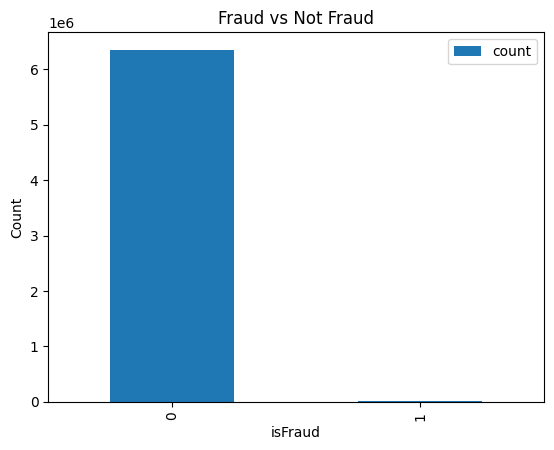

In [ ]:
print(df['isFraud'].value_counts())
df['isFraud'].value_counts().plot(kind='bar')
plt.title("Fraud vs Not Fraud")
plt.legend()
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.show()

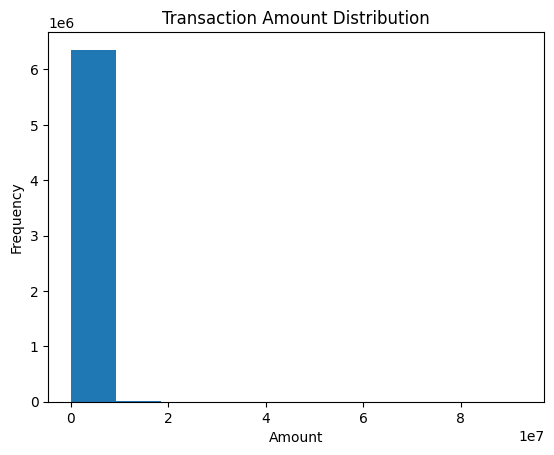

In [ ]:
plt.hist(df['amount'])
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

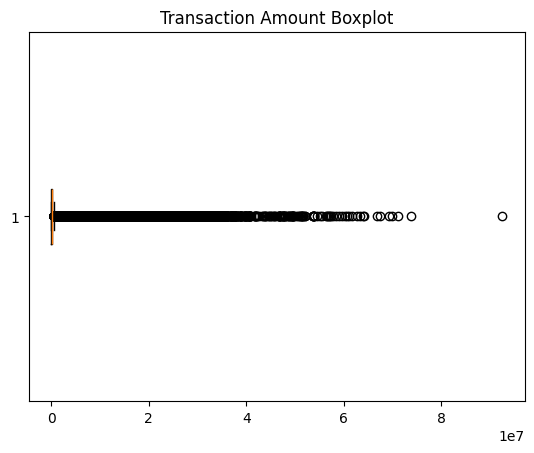

In [ ]:
plt.boxplot(df['amount'], vert=False)
plt.title("Transaction Amount Boxplot")
plt.show()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


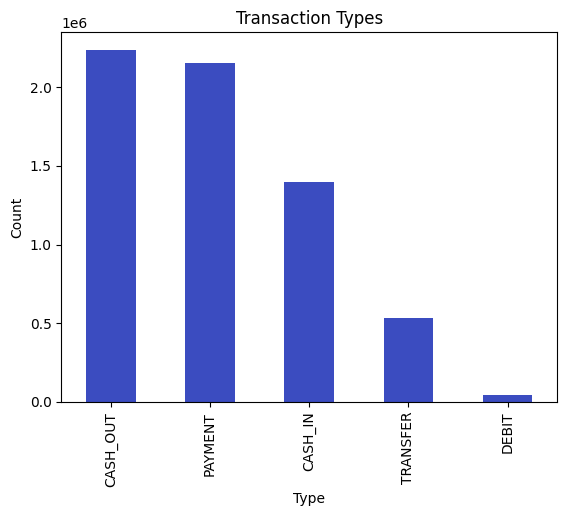

In [ ]:
print(df['type'].value_counts())

df['type'].value_counts().plot(kind='bar',cmap='coolwarm')
plt.title("Transaction Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

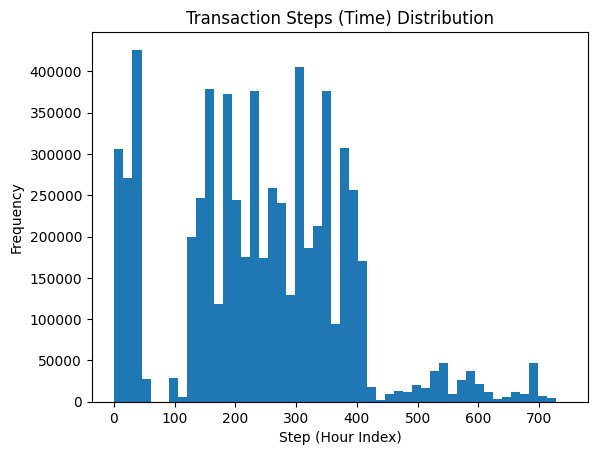

In [ ]:
plt.hist(df['step'], bins=50)

plt.title("Transaction Steps (Time) Distribution")
plt.xlabel("Step (Hour Index)")
plt.ylabel("Frequency")
plt.show()

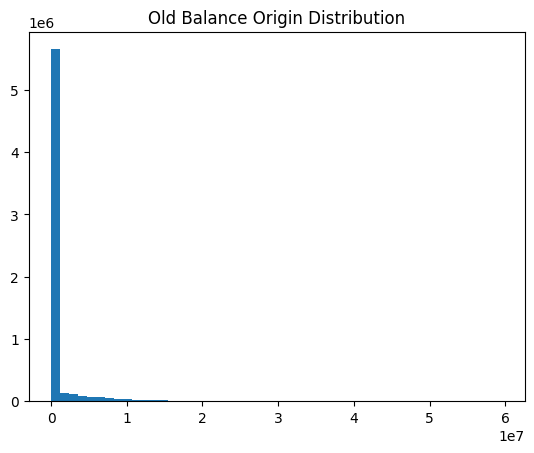

In [ ]:
plt.hist(df['oldbalanceOrg'], bins=50)
plt.title("Old Balance Origin Distribution")
plt.show()

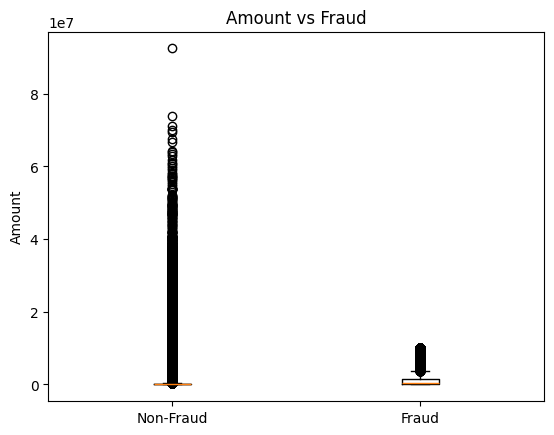

In [ ]:
fraud = df[df['isFraud'] == 1]
non_fraud = df[df['isFraud'] == 0]

plt.boxplot([non_fraud['amount'], fraud['amount']], tick_labels=['Non-Fraud', 'Fraud'])
plt.title("Amount vs Fraud")
plt.ylabel("Amount")
plt.show()

In [ ]:
pd.crosstab(df['type'], df['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


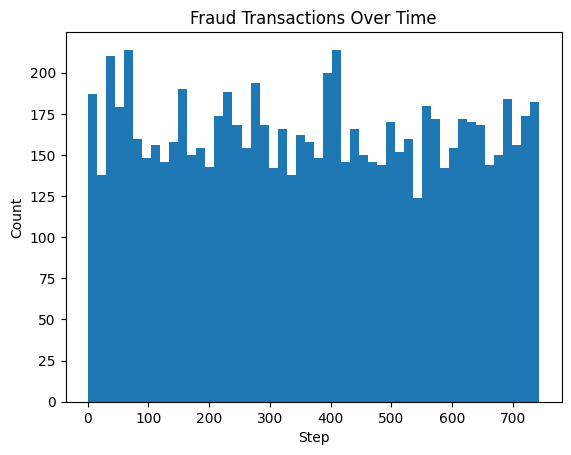

In [ ]:
plt.hist(fraud['step'], bins=50)
plt.title("Fraud Transactions Over Time")
plt.xlabel("Step")
plt.ylabel("Count")
plt.show()

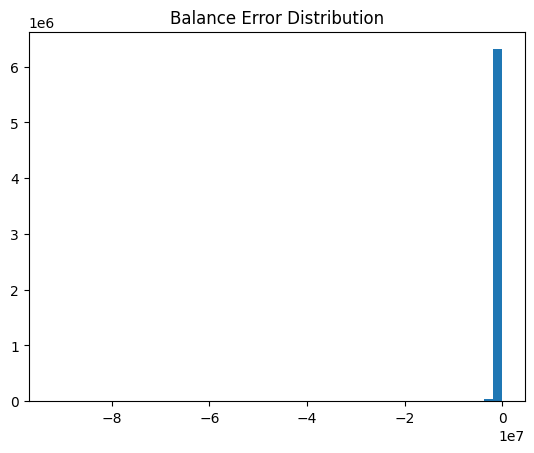

In [ ]:
df['balance_error'] = df['oldbalanceOrg'] - df['amount'] - df['newbalanceOrig']

plt.hist(df['balance_error'], bins=50)
plt.title("Balance Error Distribution")
plt.show()

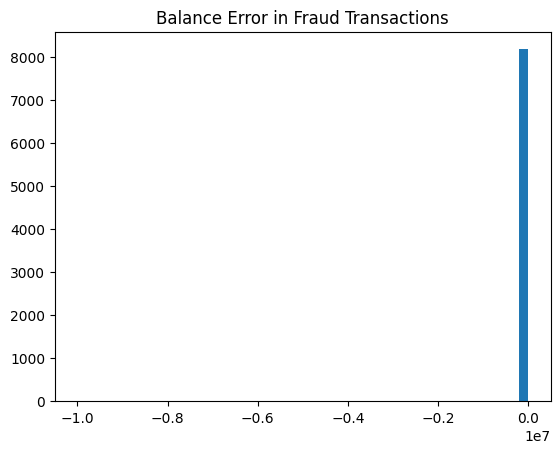

In [ ]:
plt.hist(df[df['isFraud']==1]['balance_error'], bins=50)
plt.title("Balance Error in Fraud Transactions")
plt.show()

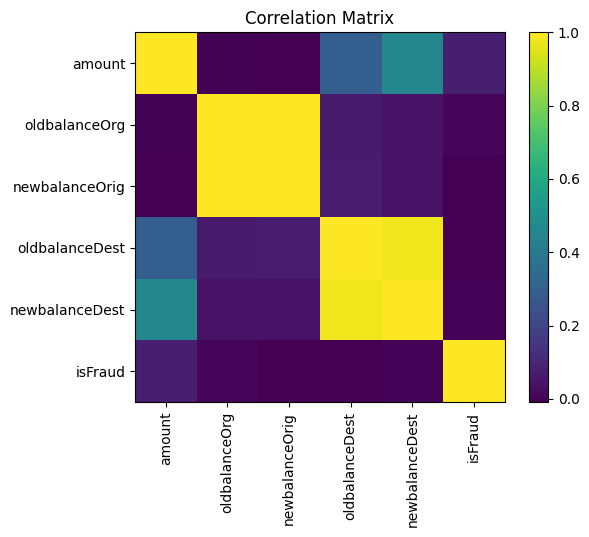

In [ ]:
corr = df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']].corr()

plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
old_skew=df['amount'].skew()
new_skew =np.log1p(df['amount']).skew()
old_skew,new_skew

(np.float64(30.99394948249038), np.float64(-0.5550183204227738))

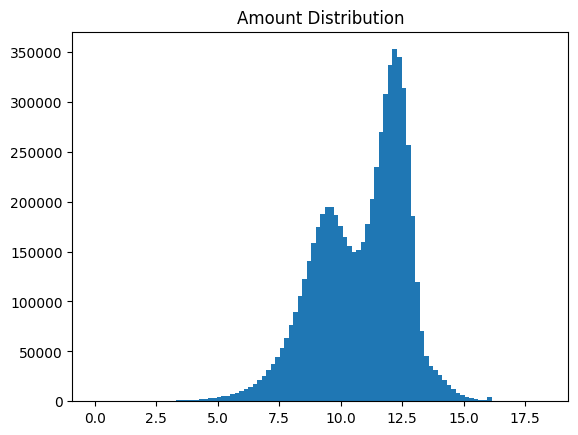

In [ ]:


plt.hist(np.log1p(df['amount']), bins=100)

plt.title("Amount Distribution")
plt.show()

# Outlier-Detection

In [ ]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

Q1: 13389.57
Q3: 208721.4775
IQR: 195331.9075


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -279608.29125
Upper Bound: 501719.33875


In [ ]:
outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]

print("Number of Outliers:", len(outliers))
outliers.head()

Number of Outliers: 338078


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_error
85,1,TRANSFER,1505626.01,C926859124,0.0,0.0,C665576141,29031.00,5515763.34,0,0,-1505626.01
86,1,TRANSFER,554026.99,C1603696865,0.0,0.0,C766572210,579285.56,0.00,0,0,-554026.99
88,1,TRANSFER,761507.39,C412788346,0.0,0.0,C1590550415,1280036.23,19169204.93,0,0,-761507.39
89,1,TRANSFER,1429051.47,C1520267010,0.0,0.0,C1590550415,2041543.62,19169204.93,0,0,-1429051.47
93,1,TRANSFER,583848.46,C1839168128,0.0,0.0,C1286084959,667778.00,2107778.11,0,0,-583848.46


In [ ]:
outliers['isFraud'].value_counts()

,count
isFraud,
0,334224
1,3854


In [ ]:
df['amount_log'] = np.log1p(df["amount"])

In [ ]:
df.drop(columns=["nameOrig","nameDest","isFlaggedFraud"],inplace=True,errors='ignore')

In [ ]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [ ]:
df["type_CASH_OUT"]=df["type_CASH_OUT"].astype(int)
df["type_DEBIT"]=df["type_DEBIT"].astype(int)
df["type_TRANSFER"] = df["type_TRANSFER"].astype(int)
df["type_PAYMENT"] = df["type_PAYMENT"].astype(int)

# Model Making

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: isFraud
0    5083526
1       6570
Name: count, dtype: int64
After SMOTE: isFraud
0    5083526
1    5083526
Name: count, dtype: int64


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,

    tree_method='hist',     # REQUIRED
    device='cuda',          # GPU ACTIVATION ✅

    n_jobs=-1,
    random_state=42
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=-1, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:751: UserWarning: [06:06:22] WARNING: /__w/xgboost/xgboost/src/common/error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.99      0.99      0.99      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.99      0.99   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
from xgboost import XGBClassifier

model2 = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,

    tree_method='hist',     # REQUIRED
    device='cuda',          # GPU ACTIVATION ✅

    n_jobs=-1,
    random_state=42
)

model2.fit(X_train_smote, y_train_smote)

NameError: name 'X_train_smote' is not defined

In [ ]:
y_pred = model2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.83      1.00      0.91      1643

    accuracy                           1.00   1272524
   macro avg       0.92      1.00      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Train Accuracy: 0.99998585488368
Test Accuracy: 0.9999677805683822


In [ ]:
print("Train Accuracy:", model2.score(X_train, y_train))
print("Test Accuracy:", model2.score(X_test, y_test))

Train Accuracy: 0.9997799648572443
Test Accuracy: 0.9997391011878755


**SO ACCORDING TO THIS OUR MODEL 1 is GIVING THE BEST CLASSIFICATION REPORT WITH 100% accuracy and good precision and recall factors**

In [ ]:
# import joblib

In [ ]:
# joblib.dump(model,"fraud_model.pkl")

In [ ]:
model.predict([[520,48000,48000,0,1500,1500,0,10.77,0,1,0,0]])

array([1])

In [ ]:
np.log1p(48000)

np.float64(10.778977123006351)

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

In [ ]:
def objective(trial):
   params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 400),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),

        # VERY IMPORTANT FOR SPEED
        "tree_method": "hist",
        "device": "cuda",
        "random_state": 42,
        "n_jobs": -1
    }
   model_optuna = XGBClassifier(**params)
   score = cross_val_score(
        model,
        X_train_smote,
        y_train_smote,
        cv=3,
        scoring="f1",     # CRITICAL FOR FRAUD
        n_jobs=-1
    ).mean()

   return score



## **Classification Report was not good using optuna**